# **Table of Contents**

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing and Importing Libraries](#Section3)<br>
4. [Data Loading and Dataset Description](#Section4)<br>
  - 4.1 [Data Loading](#Section401)<br>
  - 4.2 [Dataset Information](#Section402)<br>
5. [Data Pre-Processing](#Section5)<br>
  - 5.1 [Renaming Columns](#Section501)<br>
  - 5.2 [Assign String DataType to Message Column](#Section502)<br>
  - 5.3 [Cleaning the Reviews](#Section503)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Preparing Data for Analysis](#Section7)<br>
  - 7.1 [Brief about stopwords, stemming, lemmatization and tokenization](#Section701)<br>
  - 7.2 [Brief about BoW and TF-IDF](#Section702)<br>
  - 7.3 [Remove Stopwords and use Stemming](#Section703)<br>
  - 7.4 [Splitting Data into Train and Test for Further Model Development](#Section704)<br>
8. [Model Development and Evaluation](#Section8)<br>
    - 8.1 [Naive Bayes Classifier](#Section801)<br>
    - 8.2 [Support Vector Classifier](#Section802)<br>
9. [Conclusion](#Section9)<br>

<a id = Section1></a>
## **1. Introduction**

- **Spam/Ham** detection is one of the **classic cases** where **classification algorithms** have been used since ages.
- Spam messages or junk mesaages do not contain any valuable information. They come in bulk everyday and if not detected properly and stopped from entering the inbox will be a source of great distraction for people.
- Overtime Google has done this extremely well and we are seldom bothered by spam emails.
- Google however uses AI to make this happen but here we will see how we can accurately predict spam and ham messages.
- We won't go into the AI part and automate the stuff but rather look into the steps leading to automation

<a id = Section2></a>
## **2. Problem Statement**

**Classify Spam and Ham messages based on the text in the message using Supervised Machine Learning Techniques**

- We will use **classification techniques** to carry out the analysis
- Here I will use **Naive Bayes** and **Support Vector Classifier** to predict spam and ham messages since these 2 algorithms have been seen to work very well with text data (which gives rise to a large number of dimensions after processing)


` We will not be using KNN and Logistic Regression for the above classification as they don't work well with large number of dimensions (features)`

<a id = Section3></a>
## **3. Installing and Importing Libraries**

In [5]:
# For Numerical Python
import numpy as np

# For Panel Data Analysis
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

In [107]:
# library for regular expressions
import re

# Natural language toolkit is the most important library to carry out various NLP tasks
import nltk

In [ ]:
#nltk.download('all')  #if using for the first time make sure to run this command
#!pip install wordcloud  # to visualise the most frequently occurring words

In [124]:
from nltk.corpus import stopwords  #to remove stopwords
from nltk.stem.porter import PorterStemmer  #used for Stemming

In [108]:
from wordcloud import WordCloud   #use this after installing wordcloud

### Machine Learning Libraries

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer #for BoW
from sklearn.feature_extraction.text import TfidfVectorizer   #run this line if using TFIDF model
from sklearn.pipeline import Pipeline  #creates a machine learning pipeline
from sklearn.naive_bayes import MultinomialNB  #to apply Naive Bayes Classifier
from sklearn.svm import SVC #to apply Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  #accuracy metrics

<a id = Section4></a>
## **4. Data Loading and Dataset Description**

- We have a dataset containing about 6K records of spam and ham messages
- There are just 2 columns, one containing the label (whether spam or ham) and the other containing the message itself
- The message is written in English language

<br> 

| Records | Features | Dataset Size |
| :--: | :--: | :--: |
| 5,572 | 2 | 492 KB| 

<br> 

<a id = Section401></a>
### **4.1 Data Loading**

In [158]:
data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv", engine = 'python')

In [64]:
data.head()  #this gives 3 additional columns which are unnecessary so we can just drop them

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [159]:
data = data.iloc[:,0:2]  #selecting only the first 2 columns
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


This is our data

<a id = Section402></a>
### **4.2 Dataset Information**

In [45]:
#Checking the shape of the data
data.shape     

(5572, 2)

**5572 rows and 2 columns**

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**Observations**
- Both are categorical columns
- There seems to be no empty cells in the data
- v1 is our target variable
- v2 is the explanatory feature which requires further processing 

<a id = Section5></a>
## **5. Data Pre-Processing**

<a id = Section501></a>
### **5.1 Renaming Columns**

In [160]:
data.rename(columns={'v1': 'Label','v2': 'Message'}, inplace= True)
data.columns #column names have been changed

Index(['Label', 'Message'], dtype='object')

<a id = Section501></a>
### **5.2 Assign String DataType to the Message Column**

- The **Message** column doesn't have a uniform datatype for all the observations in the data.

- As a result, it will give **errors** when subjected to string operations.

- So we will assign a **string** datatype to the entire column to prevent such errors.

In [161]:
data.Message = data.Message.astype(str)

<a id = Section502></a>
### **5.3 Cleaning the Reviews**

- Machines do not understand text data. Hence, we need to feed numbers to the computer to get desireable results
- In order to convert text data into numerical form we have quite a few techniques but before that we need to clean the data first
- Data cleaning refers to remove unnecessary punctuations, numbers, maintaing either lower or upper case format, getting rid of irrelevant white spaces, etc..

- Here, we will **clean** the Message column by:

  - **Changing** the **case** of each word to **lowercase**.

  - **Removing** all the **punctuation marks** from each message.

  - **Removing** any additional white space from each review.

- Then, we will **create** a new column in the dataset `Clean_Message`, that will contain all the cleaned messages.

`Creating a custom function to perform data cleaning`

In [162]:
def clean_data(text):          #using the re library

    text = text.lower().strip()
    text = re.sub(r"<br>", " ", text)
    text = re.sub(r"([-?.!,/\"])", r" \1 ", text)
    text = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,']", "", text)
    text = re.sub(r"[ ]+", " ", text)
    text = text.rstrip().strip()

    return text
    

In [163]:
#Applying the above function to the Message column
data['Clean_Message'] = data.Message.apply(clean_data)
data.head()  #we can compare both the columns to understand the difference

,Label,Message,Clean_Message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


#### Removing the Message column as it is not required anymore. We will be working on the Clean_Message column from now

In [164]:
data.drop('Message', inplace = True, axis = 1)

In [71]:
data.head()

,Label,Clean_Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


<a id = Section6></a>
## **6. Exploratory Data Analysis**

Here we can explore the data a bit to understand the patterns and relationships. Since we just have one explanatory feature yet data exploration is always good

### **Question 1: What is the proportion of Spam and Ham messages in the data?** 

In [73]:
data.Label.value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

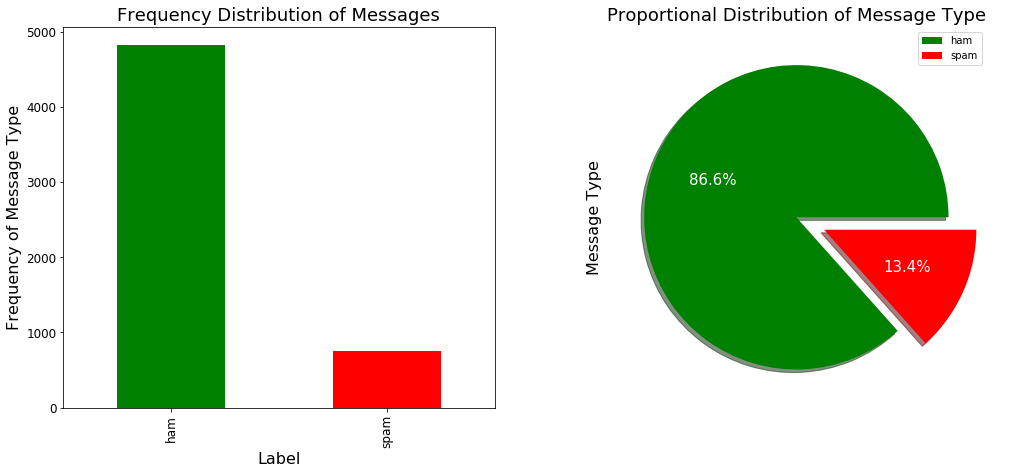

In [301]:
# Plotting the Count and Proportional Distribution of Target Column
plt.figure(figsize=(17, 7))

plt.subplot(1, 2, 1)

# Plotting the count of spam and ham messages

data.Label.value_counts().plot(kind = 'bar', color = ['green', 'red'])

plt.xlabel('Label', fontsize=16)
plt.ylabel('Frequency of Message Type', fontsize=16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.title('Frequency Distribution of Messages', fontsize=18)


plt.subplot(1,2,2)

# Plotting the proportion of spam and ham messages

data.Label.value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True, colors = ['green','red'],
                                  textprops={'fontsize':15, 'color':'white'})
plt.ylabel('Message Type', fontsize=16)
plt.title('Proportional Distribution of Message Type', fontsize=18)
plt.legend()


**Observations**

- Close to **87% messages were ham while 13% were spam**
- It's surely an **imbalanced data** but not highly imbalanced so we will not and use undersampling or oversampling techniques to correct for the imbalance
- Also, **NB algorithm** which is predominantly used for text classification is not affected by class imbalance
- **SVM also is not highly affected by class imbalance**
- Moreover, since we have imbalance, we can go ahead and use F1-score, precision and recall metrics to evaluate our model.

### **Question 2: What are the Most Common Words in Ham Messages?** 

We can use a wordcloud like visualisation to understand this

In [315]:
wordcloud = WordCloud(width=2500, height=2500, max_words=100,
                      background_color='Black', colormap='Greens_r'
                      ).generate(str(data[data.Label == 'ham']['Clean_Message']))

(-0.5, 2499.5, 2499.5, -0.5)

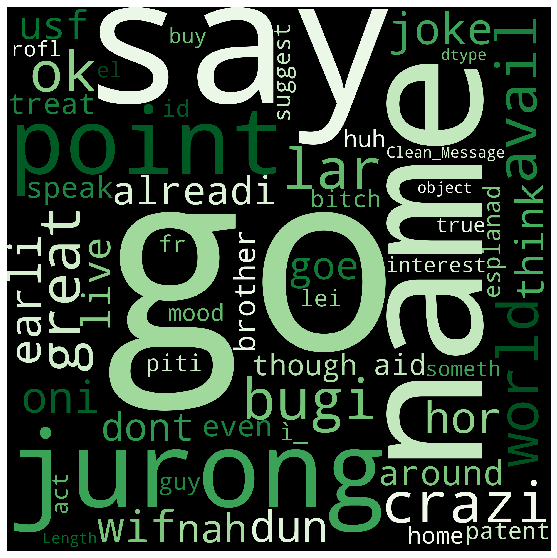

In [316]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

- The words do not seem to be associated with any kind of spam. Looks more like words from personal conversations

### **Question 3: What are the Most Common Words in Spam Messages?** 

In [318]:
wordcloud = WordCloud(width=2500, height=2500, max_words=100,
                      background_color='Black', colormap='Reds_r'
                      ).generate(str(data[data.Label == 'spam']['Clean_Message']))

(-0.5, 2499.5, 2499.5, -0.5)

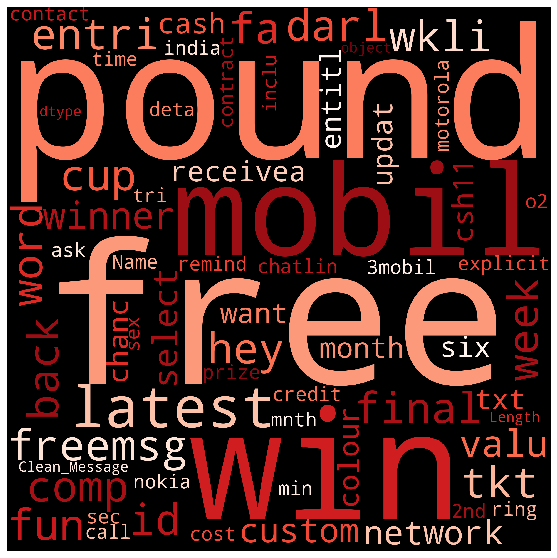

In [320]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')

- Here the words do seem to be more inclined towards spam messages specially words like **winner, entry, free, win**, etc

**Observations from EDA**

- Data is imbalance. Contains more ham messages
- The cleaned words in messages give us some hint about the kind of words used in ham and spam messages

`Note: Bigram, trigram wordclouds can also be formed but here our intention is not unsupervised learning/exploration. We are interested in classifying future messages accurately. Hence, the simple onegram wordclouds have been shown just to get some idea about the kind of messages the data set has`

<a id = Section7></a>
## **7. Preparing Data for Analysis**

- As mentioned earlier, we need to convert text data into numeric form to be used by machines for prediction purposes
- There are 2 widely used methods to achieve that
  - **Bag of Words (BoW)**
  - **Term Frequency Inverse Document Frequency (TF-IDF)**
- But before applying these techniques, we need to do some more data cleaning like removing stopwords, stemming, lemmatization and tokenization.

<a id = Section502></a>
### **7.1 Brief about stopwords, stemming, lemmatization and tokenization**

**`Stopwords`**
Words like (an, a, the, is, are, how, what and many others) do not provide any additional value in most applications and hence there is not point keeping these words in our analysis. **We remove stopwords**

**`Stemming`**
Stemming a word means to reduce that word to its base form. Like reduce goes, going, gone to go. We do stemming to reduce unncessary crowding of words (there will be no additional information from goes, going or gone. All can be reduced to go and will still provide same information)

**`Lemmatization`**
Lemmatization works same as stemming but the only difference is that with stemming we occasionally end up with base/root words which do not provide any semantic meaning. like history becomes histori which has no meaning in English vernacular. Lemmatization preserves the semantic meaning and hence is preferred over stemming in many applications where the meaning of the words are of much importance. However, stemming is done most of the times when dataset is large as lemmatization takes a lot of time to process. Stemming is quite fast.

**`Tokenization`**
Tokenization refers to breaking up a sentence into individual words or a paragraph containing many sentences into individual sentence. In this problem we do not need to tokenize sentences as each row of data corresponds to an individual message and is basically a single sentence. However, we won't have to separately use tokenization as both BoW and TF-IDF take that into account.

<a id = Section502></a>
### **7.2 Brief about BoW and TF-IDF**

**`Bag of Words (BoW)`**
BoW technique takes in text data and **tokenizes** into words. Then frequency distribution of each unique word from the corpus of all words is calculated and sorted in descending order of count. Each word now behaves as an explanatory variable. The, for each row/message of data, it tries to find words present in that message. Where ever, the word is present, it is assigned a value of 1 and where ever it is not present it is assigned a value 0. **Effectively, from the original low dimensional data we now get a huge dimensional data** where each word is a feature variable. The entire activity gets stored in the form of a **Document-Term Matrix (DTM)**.

**`Term Frequency-Inverse Document Frequency`**
Here also we eventually get a Document-Term Matrix with each word acting as an explanatory variable. However, **TF-IDF covers the con of BoW approach**. In BoW approach, we just assign 1 and 0 but do not effectively look at the importance of each word. Some words may be more important than others. This is taken care of by TF-IDF which calculates the importance of a word in a document in a collection of documents. If a word appears very frequently and also in many documents it means it might not be very useful in explaining the outcome variable. **The 2 terms TF and IDF work in tandem to assign values to words according to their importance**.

<a id = Section502></a>
### **7.3 Remove Stopwords and use Stemming**

`For the current analysis I am using stemming but lemmatization can also be used and whichever gives higher accuracy on test data that can be chosen`

In [194]:
#defining a custom function to process the Message column

ps = PorterStemmer()  #initializing the Stemmer object

#the below function first splits each message into individual words and creates a list. Then it uses stemming
#on all those words which are not part of stopwords. Finally it joins all the stemmed words back into a sentance
#and stores in a list

def clean_text(text):
    text = text.split()
    new_text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    new_text = " ".join(new_text)
    return new_text

In [190]:
data.Clean_Message = data.Clean_Message.apply(clean_text)

In [215]:
data.head()

,Label,Clean_Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


**Stopwords** have been removed and other words have been converted to their root form.

<a id = Section502></a>
### **7.4 Splitting Data into Train and Test for Further Model Development**

- Now, we will **split** the dataset into **Train** and **Test** subsets.

- We will use **80%** data for **training** and the remaining **20%** data for **testing** our model.


- First, we will **separate** the **labels** from the **messages**

In [214]:
# Separating the Messages (X will form our Feature matrix)
X = data.Clean_Message.values

#showing the first 5 messages
X[:5]

array(['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
       'ok lar joke wif u oni',
       'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratet&c appli 08452810075over18',
       'u dun say earli hor u c alreadi say',
       'nah dont think goe usf live around though'], dtype=object)

In [217]:
# Separating the labels
y = data.Label.values

#showing the first 5 messages
y[:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

- After **separating** the *messages* and *labels*, we will **split** the data into **train** and **test sets**.

In [218]:
# Using scikit-learn's train_test_split function to split the dataset into train and test sets.
# 80% of the data will be in the train set and 20% in the test set, as specified by test_size=0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
# Checking the shapes of the training and test sets

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (4457,) (4457,)
Testing Data Shape: (1115,) (1115,)


- The data has been **divided** into training and test sets.

<a id = Section7></a>
## **8. Model Development and Evaluation**

- We will apply **Naive Bayes and Support Vector Machines (Classifier)** to build and evaluate our model as these 2 classifiers have proved to work very well with text data


- But in order to train the 2 classifers, we first need to build our feature matrix in such a way that it is convenient for the algos to use it.


- Here, I am using the BoW approach to build the Document Term Matrix but TF-IDF can also be used. Again, we can compare both the methods and whichever gives higher accuracy we can go ahead with that for classification of future data


- CountVectorizer from sklearn implements the BoW technique in Python

In [267]:
#initializing the countvectorizer object
cv = CountVectorizer()

`We will create a Machine Learning Pipeline which will carry out the following steps in order`


- This will first, **vectorize** the data using **CountVectorizer**, creating a **Document Term matrix** from the dataset, then will **pass** this **data** to our **classifier**.

- The classifier in this case are 2 - **Multinomial Naive Bayes** and **Support Vector** classifier.

- These algorithms are **most suited** for **vectorized text** that contains a *large number of features*.

- Creating a pipeline allows us to **streamline** our Machine Learning workflow by performing **multiple steps** in a single pass.

<a id = Section502></a>
### **8.1 Naive Bayes Classifier**

- Naive Bayes is used for classification purposes
- It is a probabilistic classifier which uses **Bayes Theorem** to calculate the probability of a class (hypothesis) given data (explanatory features)
- Essentially, the prior probabilities (which just give us an average score) are updated using evidence from the data to get the posterior probabilities of each class and which ever class has higher probability the data point is classified as that class
- It is called **Naive** as it assumes that the explanatory variables (features) are all independent of each other i.e. the occurrance of anyone not dependent on the occurrance of the other


In [268]:
nb_pipeline = Pipeline([('vect', cv), ('clf', MultinomialNB())])

- **Fitting our pipeline with the Training Data**

In [269]:
nb_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

- **Making Predictions on Test Set**

In [270]:
y_pred = nb_pipeline.predict_proba(X_test)

#probabilities for first 5 messages in test data
y_pred[:5]

array([[9.99959651e-01, 4.03485272e-05],
       [9.99997907e-01, 2.09306912e-06],
       [3.64282963e-04, 9.99635717e-01],
       [9.99999778e-01, 2.21589970e-07],
       [3.44812135e-24, 1.00000000e+00]])

**Let's have a look at the actual lables**

In [271]:
y_pred = nb_pipeline.predict(X_test)
y_pred[:5]

array(['ham', 'ham', 'spam', 'ham', 'spam'], dtype='<U4')

**Model Evaluation**

- Checking the model **accuracy** on both train and test data sets.

- We are using the **classifier**'s `score` method, which calculates the **accuracy score** of the model on a given data.

In [272]:
print('Model Accuracy for the Train set:', nb_pipeline.score(X_train, y_train))

Model Accuracy for the Train set: 0.9930446488669509


In [273]:
print('Model Accuracy for the Test set:', nb_pipeline.score(X_test, y_test))

Model Accuracy for the Test set: 0.9838565022421525


**Observations:**

- We get an **accuracy** of more than **98%** on both of our train set and test set.

- This implies that our model is **not overfitting** and is actually performing very well.

- It is **generalizing** well on unseen data, and giving good results.

**We might be getting such high accuracy values but let's not forget that our dataset was imbalanced. Hence, we will not base our conclusion on the accuracy score `though it is known that NB is not affected by imbalance datasets`. We need to compute the confusion matrix and corresponding precision, recall and F1-scores associated with it**.

- Creating **confusion matrix** and **classification report** of our predictions

In [326]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham', 'spam'])

,ham,spam
ham,961,4
spam,14,136


- In our test data we had 965 ham messages and 150 spam messages

- Naive Bayes has classified 961 out of 965 ham messages correctly and 136 out of 150 spam messages correctly. Both precision and recall are more than 90%

- This shows that NB was not affected by data imbalance.

In [265]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



- As stated above, our model is performing **great** on both **ham and spam** messages. 

- f1-score is 99%. 

- **Naive Bayes did a great job in detecting SPAM AND HAM MESSAGES**

- Creating a dataframe containing the **test data** along with the **predictions** made by the model for comparison

In [236]:
evaluation_df = pd.DataFrame({'Message': X_test, 'Actual Label': y_test, 'Predicted Label': y_pred})
evaluation_df.head(10)

,Message,Actual Label,Predicted Label
0,funni fact nobodi teach volcano 2 erupt tsunam...,ham,ham
1,sent score sopha secondari applic school think...,ham,ham
2,know someon know fanci call 09058097218 find p...,spam,spam
3,promi get soon youll text morn let know made ok,ham,ham
4,congratul ur award either å£500 cd gift vouche...,spam,spam
5,ill text carlo let know hang,ham,ham
6,k didt see kwhere,ham,ham
7,messag responc happend,ham,ham
8,get gandhipuram walk cross cut road right side...,ham,ham
9,flippin shit yet,ham,ham


<a id = Section502></a>
### **8.2 Support Vector Classifier**

- SVM can do both regression and classification
- When SVM is used for classification, we call it **Support Vector Classifier**
- **SVC uses linear hyperplane** to classify data into 2 or multiple classes
- It uses an optimization technique to simultaneously maximize the margin between 2 classes along with minimizing the error
- In most cases, we do not have perfectly separable data and hence SVC has to take into consideration the error minimization along with maximization of margin and has to do it in such a way that the model does not overfit the data. In order to achieve that, it uses a regularisation parameter **'C'**
- Again, when data is not linearly separable even after taking error into consideration, SVM usese the famous **Kernel trick** to transform data and use the old, simple, vanilla hyperplane concept for classification


In [240]:
svc_pipeline = Pipeline([('vect', cv), ('clf', SVC())])

- **Fitting our pipeline with the Training Data**

In [241]:
svc_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                   

- **Making Predictions on Test Set**

In [242]:
y_pred = svc_pipeline.predict(X_test)
y_pred[:5]

array(['ham', 'ham', 'ham', 'ham', 'spam'], dtype=object)

**Model Evaluation**

In [243]:
print('Model Accuracy for the Train set:', svc_pipeline.score(X_train, y_train))

Model Accuracy for the Train set: 0.997083239847431


In [244]:
print('Model Accuracy for the Test set:', svc_pipeline.score(X_test, y_test))

Model Accuracy for the Test set: 0.97847533632287


**Observations:**

- We get an **accuracy** of more than **97%** on both of our train set and test set. However, test accuracy is slightly lower than **Naive Bayes**

- This implies that our model is **not overfitting** and is actually performing very well.

- It is **generalizing** well on unseen data, and giving good results.

- Creating **confusion matrix** and **classification report** of our predictions

In [245]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham', 'spam'])

,ham,spam
ham,965,0
spam,24,126


- SVC classifies all **ham messages correctly** while the confusion happens in the **spam messages**

- It is not able to classify 24 spam messages correctly and hence we see a reduced recall for SVC compared to NB

- This could be due to the fact that SVC is not great like NB in dealing with class imbalance


In [246]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       1.00      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



- As stated above, our model is performing **great** on both **ham and spam** messages. 

- f1-score for spam is lower than NB. The average f1-score is also lower than NB

- **Recall** for SVM (84%) is quite lower than NB (91%)


- Creating a dataframe containing the **test data** along with the **predictions** made by the model for comparison

In [248]:
evaluation_df = pd.DataFrame({'Message': X_test, 'Actual Label': y_test, 'Predicted Label': y_pred})
evaluation_df.head(10)

,Message,Actual Label,Predicted Label
0,funni fact nobodi teach volcano 2 erupt tsunam...,ham,ham
1,sent score sopha secondari applic school think...,ham,ham
2,know someon know fanci call 09058097218 find p...,spam,ham
3,promi get soon youll text morn let know made ok,ham,ham
4,congratul ur award either å£500 cd gift vouche...,spam,spam
5,ill text carlo let know hang,ham,ham
6,k didt see kwhere,ham,ham
7,messag responc happend,ham,ham
8,get gandhipuram walk cross cut road right side...,ham,ham
9,flippin shit yet,ham,ham


<a id = Section7></a>
## **9. Conclusion**

- Both Naive Bayes and Support Vector Machine have performed very well

- **However, Naive Bayes has performed better compared to SVM** as overall accuracy is higher. Also, the **Recall** in case of **spam messages** is much higher for NB. It showed better capability in identifying spam messages

- So, in essence, whatever might be our objective (i.e. maximum accuracy or recall or precision or f1-score), we should go forward with Naive Bayes for this classification problem

**`How to make it even better?`**

Though our model has performed very well, we can still try other things to find if it can be made better. Following points can be considered:
  
  - We can use TF-IDF instead of BoW 
  - We can also use **Lemmatization** instead of **Stemming** and see the difference in prediction accuracy
  - When initializing CountVectorizer or TFIDF, we can use **max_features** (which decides the number of X-variables in the model) in a gridsearch manner and find the best f1-score for test data. 
  
  **Note, the train accuracy will definitely decrease as we reduce the max_features(complexity) but it might happen that test accuracy can go up**

**Just a side note**: In order to create more beautiful wordclouds of different shapes and style and colour, we can refer to a new package called **`stylecloud`**